In [1]:
# import utente
        
import pandas as pd
# import pandas_profiling as pandasprof
import importlib as imp
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import missingno as msno

In [2]:
df = pd.read_csv('/Users/rmesquita/Google Drive/PGBIA/T3_P2/datasets/dataset_intermedio.csv', 
                 sep = ';', decimal = ',', encoding = 'utf-8')

In [3]:
df = df.drop(['index',
                'ConjugeMotivoIndisponibilidade', 
                'DataNascimento',
                'IdadeCalculada',
                'Utente'], axis=1)

# Preenchimento de NaN
usando o Pandas.fillna

In [4]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values = 'NaN', strategy = '0', axis = 0)
#imputer = imputer.fit(df.iloc[:, 21:106])
#df.iloc[:, 21:106] = imputer.transform(df.iloc[:, 21:106])

filter_col = [col for col in df if col.startswith('Nr')]

for col in filter_col:
        df[col] = df[col].fillna(0)
        df[col] = df[col].astype('float');

In [5]:
# Drop of Date
df = df.drop(['Data'], axis=1)

In [6]:
df = df.reindex_axis(['AreaCurso',
 'AreaFormacao',
 'CategoriaAtrib',
 'CnpAnterior',
 'CursoEstabelecimentoEnsinoSup',
 'Empregado',
 'EstadoCivil',
 'FormacaoProf',
 'HabilitacaoEscolar',
 'Nacionalidade',
 'Qualificacao',
 'RSI',
 'Sexo',
 'Idade',
 'CursoAnoConclusao',
'DiasDesemprego',
'NivelDeficiencia',
    'NrAnulacoes',
 'NrAnulacoesPorMotivoCADUCIDADEDODOCUMENTODEIDENTIFICACAO',
 'NrAnulacoesPorMotivoCOLOCACAOCANDIDATURAEXTERNA',
 'NrAnulacoesPorMotivoCOLOCACAOPORMEIOSPROPRIOSPORCONTADE',
 'NrAnulacoesPorMotivoCOLOCACAOPORMEIOSPROPRIOSPORCONTAPRO',
 'NrAnulacoesPorMotivoCORRECCAOCOLOCACAOFME',
 'NrAnulacoesPorMotivoCORRECCAOREINSCRICAOFME',
 'NrAnulacoesPorMotivoCRIACAODOPROPRIOEMPREGO',
 'NrAnulacoesPorMotivoCUMPRIMENTOSERVICOMILITAR',
 'NrAnulacoesPorMotivoDESISTIU',
 'NrAnulacoesPorMotivoDESISTENCIAOUEXCLUSAODEFORMACAO',
 'NrAnulacoesPorMotivoDESISTENCIAOUEXCLUSAODEMEDIDASDEEMPRE',
 'NrAnulacoesPorMotivoDESISTENCIAOUEXCLUSAODETRABALHOSOCIALM',
 'NrAnulacoesPorMotivoDETENCAOEMESTABELECIMENTOPRISIONAL',
 'NrAnulacoesPorMotivoEMIGRACAOAUSENCIADOPAIS',
 'NrAnulacoesPorMotivoFALECIMENTO',
 'NrAnulacoesPorMotivoFALTAACONVOCATORIA',
 'NrAnulacoesPorMotivoFALTAAOCONTROLO',
 'NrAnulacoesPorMotivoFALTAAAPRESENTACAO',
 'NrAnulacoesPorMotivoFREQUENCIADECURSODEFORMACAOPROFISSIONA',
 'NrAnulacoesPorMotivoFREQUENCIADEESTAGIOPROFISSIONALPEPAC',
 'NrAnulacoesPorMotivoFREQUENCIADEESTAGIOPROFISSIONALPEPAL',
 'NrAnulacoesPorMotivoFREQUENCIADEESTAGIOPROFISSIONALPEPAP',
 'NrAnulacoesPorMotivoFREQUENCIADEFORMACAODOIEFPENTRADASGF',
 'NrAnulacoesPorMotivoFREQUENCIADEFORMACAOEMENTIDADEEXTERNA',
 'NrAnulacoesPorMotivoINCAPACIDADEPROLONGADAPERMANENTEPARAO',
 'NrAnulacoesPorMotivoINCUMPRIMENTODAAPRESENTACAOQUINZENAL',
 'NrAnulacoesPorMotivoINSCRICAOCANDIDATURAEXTERNA',
 'NrAnulacoesPorMotivoINSERCAONOUTROSPROGRAMASMEDIDASEMPREGO',
 'NrAnulacoesPorMotivoINSERCAOPORCONTAOUTREMNASEQUENCIADE',
 'NrAnulacoesPorMotivoINICIODELICENCADEMATERNIDADEPATERNIDA',
 'NrAnulacoesPorMotivoOUTROSMOTIVOS',
 'NrAnulacoesPorMotivoRECUSADEEMPREGOCONVENIENTE',
 'NrAnulacoesPorMotivoRECUSADEFORMALIZACAODEPPE',
 'NrAnulacoesPorMotivoRECUSADEFORMACAOPROFISSIONAL',
 'NrAnulacoesPorMotivoRECUSADEINTERVENCAO',
 'NrAnulacoesPorMotivoRECUSADETRABALHOSOCIALMENTENECESSARIO',
 'NrAnulacoesPorMotivoREFORMOUSE',
 'NrAnulacoesPorMotivoREINICIODEESTUDOS',
 'NrAnulacoesPorMotivoTRANSFERENCIADECENTRODEEMPREGO',
 'NrAnulacoesPorMotivoTRANSFERENCIAREGIOESAUTONOMAS',
 'NrApresentacoes',
 'NrApresentacoesComResultadoCADUCIDADEDODOCUMENTODEIDENTIFIC',
 'NrApresentacoesComResultadoCOLOCACAOCANDIDATURAEXTERNA',
 'NrApresentacoesComResultadoCOLOCACAOPORMEIOSPROPRIOSPORCO',
 'NrApresentacoesComResultadoCORRECCAOCOLOCACAOFME',
 'NrApresentacoesComResultadoCORRECCAOREINSCRICAOFME',
 'NrApresentacoesComResultadoCRIACAODOPROPRIOEMPREGO',
 'NrApresentacoesComResultadoCUMPRIMENTOSERVICOMILITAR',
 'NrApresentacoesComResultadoDESISTIU',
 'NrApresentacoesComResultadoDESISTENCIAOUEXCLUSAODEFORMACAO',
 'NrApresentacoesComResultadoDESISTENCIAOUEXCLUSAODEMEDIDASD',
 'NrApresentacoesComResultadoDESISTENCIAOUEXCLUSAODETRABALHO',
 'NrApresentacoesComResultadoDETENCAOEMESTABELECIMENTOPRISIONA',
 'NrApresentacoesComResultadoEMIGRACAOAUSENCIADOPAIS',
 'NrApresentacoesComResultadoFALECIMENTO',
 'NrApresentacoesComResultadoFALTAACONVOCATORIA',
 'NrApresentacoesComResultadoFALTAAOCONTROLO',
 'NrApresentacoesComResultadoFALTAAAPRESENTACAO',
 'NrApresentacoesComResultadoFREQUENCIADECURSODEFORMACAOPROF',
 'NrApresentacoesComResultadoFREQUENCIADEESTAGIOPROFISSIONALP',
 'NrApresentacoesComResultadoFREQUENCIADEFORMACAODOIEFPENTR',
 'NrApresentacoesComResultadoFREQUENCIADEFORMACAOEMENTIDADEE',
 'NrApresentacoesComResultadoINCAPACIDADEPROLONGADAPERMANENTE',
 'NrApresentacoesComResultadoINCUMPRIMENTODAAPRESENTACAOQUINZE',
 'NrApresentacoesComResultadoINSCRICAOCANDIDATURAEXTERNA',
 'NrApresentacoesComResultadoINSERCAONOUTROSPROGRAMASMEDIDASE',
 'NrApresentacoesComResultadoINSERCAOPORCONTAOUTREMNASEQUEN',
 'NrApresentacoesComResultadoINICIODELICENCADEMATERNIDADEPA',
 'NrApresentacoesComResultadoOUTROSMOTIVOS',
 'NrApresentacoesComResultadoRECUSADEEMPREGOCONVENIENTE',
 'NrApresentacoesComResultadoRECUSADEFORMALIZACAODEPPE',
 'NrApresentacoesComResultadoRECUSADEFORMACAOPROFISSIONAL',
 'NrApresentacoesComResultadoRECUSADEINTERVENCAO',
 'NrApresentacoesComResultadoRECUSADETRABALHOSOCIALMENTENECES',
 'NrApresentacoesComResultadoREFORMOUSE',
 'NrApresentacoesComResultadoREINICIODEESTUDOS',
 'NrApresentacoesComResultadoTRANSFERENCIADECENTRODEEMPREGO',
 'NrApresentacoesComResultadoTRANSFERENCIAREGIOESAUTONOMAS',
 'NrConvocatorias',
 'NrDescendentesCargo',
 'NrEncaminhamentos',
 'NrInscricoes',
 'NrIntervencoes',
 'NrMudancasCategoria',
 'NrPessoasCargo',
 'LTU'], axis=1)

### Dropping '?' from label and storing this into a new dataframe

In [7]:
df_nonltu = df[df['LTU'] == '?']
df = df[df['LTU'] != '?']

### Splitting label from features

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, 102]

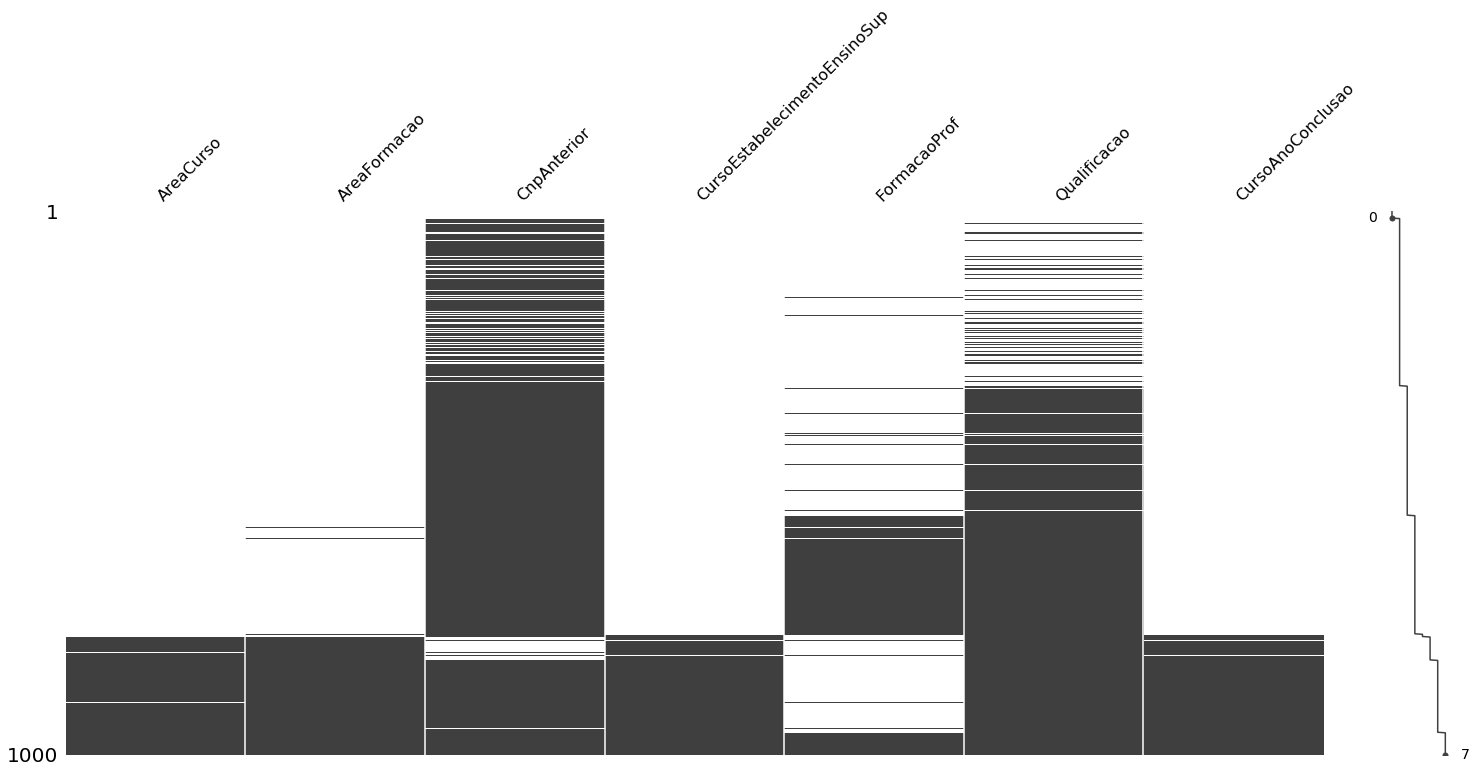

In [9]:
%matplotlib inline
msno.matrix(df.sample(1000), filter='bottom', p=0.9, sort='ascending')

## Encoding categorical data
### Encoding the Independent Variables

In [10]:
#import category_encoders as ce

#encoder = ce.BackwardDifferenceEncoder(cols=[...])
#encoder = ce.BinaryEncoder(cols=[...])
#encoder = ce.HashingEncoder(cols=[...])
#encoder = ce.HelmertEncoder(cols=[...])
#encoder = ce.OneHotEncoder(cols=[...])
#encoder = ce.OrdinalEncoder(cols=[...])
#encoder = ce.SumEncoder(cols=[...])
#encoder = ce.PolynomialEncoder(cols=[...])

In [13]:
X['AreaCurso'] = X['AreaCurso'].astype('str')
X['AreaFormacao'] = X['AreaFormacao'].astype('str')
X['CategoriaAtrib'] = X['CategoriaAtrib'].astype('str')
X['CnpAnterior'] = X['CnpAnterior'].astype('str')
X['CursoAnoConclusao'] = X['CursoAnoConclusao'].astype('float')
X['CursoEstabelecimentoEnsinoSup'] = X['CursoEstabelecimentoEnsinoSup'].astype('float')
X['Empregado'] = X['Empregado'].astype('str')
X['EstadoCivil'] = X['EstadoCivil'].astype('str')
X['FormacaoProf'] = X['FormacaoProf'].astype('str')
X['HabilitacaoEscolar'] = X['HabilitacaoEscolar'].astype('str')
X['Nacionalidade'] = X['Nacionalidade'].astype('str')
X['NivelDeficiencia'] = X['NivelDeficiencia'].astype('category')
X['Qualificacao'] = X['Qualificacao'].astype('str')
X['RSI'] = X['RSI'].astype('str')
X['Sexo'] = X['Sexo'].astype('str')

# variavel ordinal
# X['CursoAnoConclusao'] = X['CursoAnoConclusao'].astype('category')
# X['DiasDesemprego'] = X['DiasDesemprego'].astype('category')
# X['Idade'] = X['Idade'].astype('category')

# inserting codes (not needed so far)
# X['AreaCurso'] = X['AreaCurso'].cat.codes

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

i = 1
#while i <= 16:
filter_col = [col for col in X.iloc[:, 0:17]]
for col in filter_col:
        X[col] = labelencoder_X.fit_transform(X[col])
#        i+= 1;

### Encoding the Dependent Variable

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification models
### Decision tree

In [19]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

[0 1 1 ..., 0 2 0]


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7101    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 2629    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1704    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  414    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  108    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   32    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0   12    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    8    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    3    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    0    0    0

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)